<a href="https://colab.research.google.com/github/ANGEL201985/ANGEL201985/blob/main/Proctor_Modificado_Talleripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,1,2,3,4
PESO MOLDE + SUELO,11340.00,11522.00,11711.00,11754.00
PESO MOLDE,6737.00,6737.00,6737.00,6737.00
PESO SUELO COMPACTADO,4603.00,4785.00,4974.00,5017.00
VOLUMEN DE MOLDE,2121.00,2121.00,2121.00,2121.00
DENSIDAD HUMEDA,2.17,2.26,2.35,2.37
PESO SUELO HUMEDO TARA,341.70,408.60,321.10,387.20
PESO SUELO SECO TARA,332.70,391.00,301.20,356.50
PESO AGUA,9.00,17.60,19.90,30.70
PESO DE SUELO SECO,332.70,391.00,301.20,356.50
CONTENIDO DE HUMEDAD,2.71,4.50,6.61,8.61


El valor del factor de correlacion es: 1.0


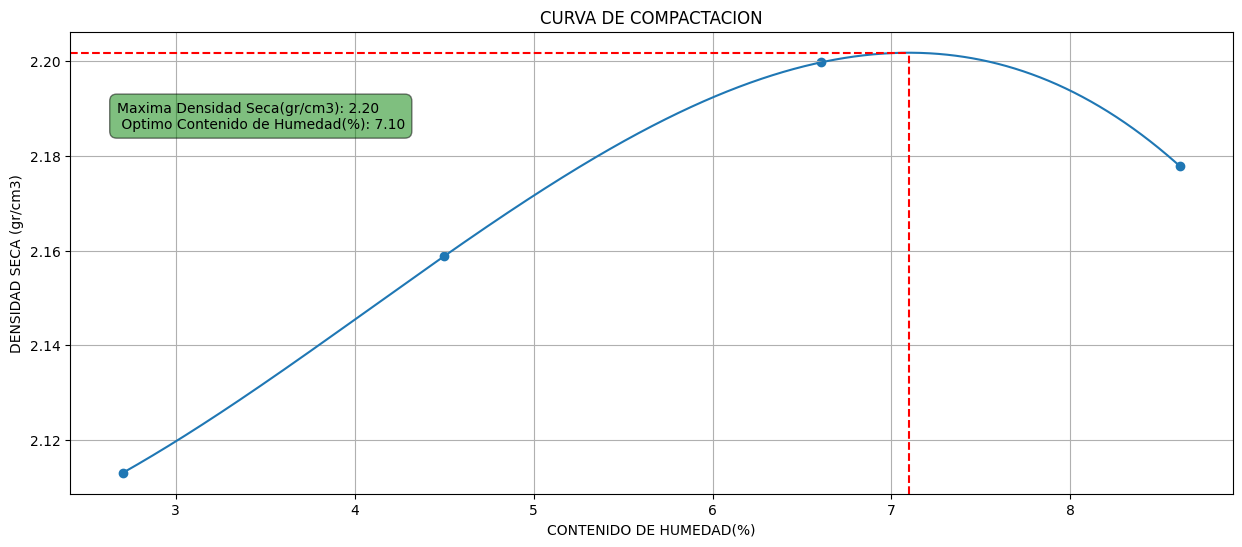

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display
from IPython.display import HTML
from sklearn.metrics import r2_score

peso_molde_suelo = np.array([11340, 11522, 11711, 11754])
peso_molde = 6737
peso_suelo_compactado = np.subtract(peso_molde_suelo, peso_molde)
volumen_molde = 2121
densidad_humeda = np.divide(peso_suelo_compactado, volumen_molde)
peso_suelo_humedo_tara = np.array([341.7, 408.6, 321.1, 387.2])
peso_suelo_seco_tara = np.array([332.7, 391, 301.2, 356.5])
peso_agua = np.subtract(peso_suelo_humedo_tara,peso_suelo_seco_tara )
peso_recipiente = 0
peso_suelo_seco = np.subtract(peso_suelo_seco_tara, peso_recipiente )
contenido_humedad = np.divide(peso_agua*100, peso_suelo_seco)
densidad_seca = np.divide(densidad_humeda, 1 + contenido_humedad/100)

# Crearemos nuestra tabla
tabla = {'PESO MOLDE + SUELO':peso_molde_suelo, 'PESO MOLDE':peso_molde, 'PESO SUELO COMPACTADO': peso_suelo_compactado,
         'VOLUMEN DE MOLDE': volumen_molde, 'DENSIDAD HUMEDA':densidad_humeda, 'PESO SUELO HUMEDO TARA': peso_suelo_humedo_tara,
         'PESO SUELO SECO TARA': peso_suelo_seco_tara, 'PESO AGUA':peso_agua, 'PESO DE SUELO SECO':peso_suelo_seco,
         'CONTENIDO DE HUMEDAD': contenido_humedad, 'DENSIDAD SECA':densidad_seca}

tabla_pandas = pd.DataFrame(tabla, index = [1,2,3,4]).T.round(2)
#print(tabla_pandas)

tabla_estilos = (
    tabla_pandas.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))

# Ajuste de regresion polinomial
coeficientes = np.polyfit(contenido_humedad, densidad_seca, 3)
poly = np.poly1d(coeficientes)

# Derivar el polinomio para calcular el valor maximo de X Contenido optimo de humdad
derivada = np.polyder(poly)
raices = np.roots(derivada)
optimo_contenido_humedad_0 = np.max(raices)
#print(f'el optimo contenido de humedad es: {optimo_contenido_humedad_0}')
densidad_seca_max_0 = poly(optimo_contenido_humedad_0)
#print(f'La maxima densidad seca es: {densidad_seca_max_0}')

#Crearemos una cierta cantidad de putnos usando la funcion linspace
contenido_humedad_rango = np.linspace(min(contenido_humedad), max(contenido_humedad), 1000)
densidad_seca_rango = poly(contenido_humedad_rango)
densidad_seca_max = np.max(densidad_seca_rango)
#print(f'La maxima densidad seca usando linspace es: {densidad_seca_max}')
indice_max_densidad_seca = np.argmax(densidad_seca_rango)
optimo_contenido_humedad = contenido_humedad_rango[indice_max_densidad_seca]
#print(f'el optimo contenido de humedad usando linspace es: {optimo_contenido_humedad}')

#Calculamos los valores predecidos
densidad_seca_predecido = poly(contenido_humedad)

#Calculamos la el factor de correlacion de los datos
r2 = r2_score(densidad_seca, densidad_seca_predecido)
print(f'El valor del factor de correlacion es: {r2 }')

#Graficaremos la curva y los puntos de dispersion
plt.figure(figsize=(15, 6))
ax = plt.gca()
#Calculando los valores maximos y minimos de x e y

plt.scatter(contenido_humedad, densidad_seca)
plt.plot(contenido_humedad_rango, densidad_seca_rango)

#Calculando los valores maximos y minimos de x e y
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
#print(f'los valores minimo y maximo de x son: {x_min} y {x_max}')
#print(f'los valores minimo y maximo de y son: {y_min} y {y_max}')

#Calcularemos los valores normalizados
x_normalizado = (optimo_contenido_humedad-x_min)/(x_max-x_min)
y_normalizado = (densidad_seca_max-y_min)/(y_max-y_min)

#plt.axvline(x = optimo_contenido_humedad, ymin = 0, ymax =densidad_seca_max, color = 'red', linestyle= '--')
#plt.axhline(y = densidad_seca_max, xmin = 0, xmax =optimo_contenido_humedad, color = 'red', linestyle= '--')
plt.axvline(x = optimo_contenido_humedad, ymin = 0, ymax =y_normalizado, color = 'red', linestyle= '--')
plt.axhline(y = densidad_seca_max, xmin = 0, xmax =x_normalizado, color = 'red', linestyle= '--')

plt.xlabel('CONTENIDO DE HUMEDAD(%)')
plt.ylabel('DENSIDAD SECA (gr/cm3)')
plt.title('CURVA DE COMPACTACION')

estilo_caja = dict(facecolor = 'green', alpha = 0.5, edgecolor ='black', boxstyle = 'round, pad =0.5')
plt.text(0.04, 0.85, f'Maxima Densidad Seca(gr/cm3): {densidad_seca_max :.2f}\n Optimo Contenido de Humedad(%): {optimo_contenido_humedad:.2f}',
         ha= 'left', va= 'top', transform = plt.gca().transAxes, bbox = estilo_caja)

plt.grid()
plt.show()


